# Overview 

Novice level

Question #2
Do malignant lesions occur more along some gender or age line? 


# Table of Contents

1. [Setup](#another_cell) <br>
2. [Data Loading](#load_cell) <br>

3. [Data wrangling](#w_cell) <br>
    i. Population <br>
    ii. [Confusion Matrix](#conf_cell) <br>
    iii. [Violin Plot](#violin_cell)
4. [Visualization](#viz_cell)


<a id='another_cell'></a>
# Setup
Import packages

In [1]:
import PIL
import cv2
import os
from os import listdir
from os.path import isfile, join
import json
import numpy as np
import seaborn as sns # pip install -U seaborn
from matplotlib import pyplot as plt
import pandas as pd

# Load data from directories <a id='load_cell'></a>
Find current working directory

In [2]:
directory = os.getcwd().split("\\")[:-2]
new_directory = ""
for component in directory:
    new_directory += component
    new_directory += "\\"

Create paths to image and description folders

In [3]:
if 'sample_imgs' in listdir(new_directory):
    print("You have data")
    images = new_directory + '\\sample_imgs'
    descriptions = new_directory + '\\sample_dscs'
    
    # Creates paths to individual description files
    des_paths = [join(descriptions, f) for f in listdir(descriptions) if isfile(join(descriptions, f))]
else:
    print("You need to download the images using the ISIC Downloader")

You have data


# Data wrangling <a id='w_cell'></a>

In [4]:
malignant = []
benign    = []
sex       = []
status    = []
age       = []

### Populate the above lists by reading the comments below and following the directions

In [5]:
for im in des_paths:
    with open(im) as json_file:
        j = json.load(json_file)
        
        # To view json format uncomment the two lines below 
        #print(json.dumps(j, indent=4))
        #break
        if j["meta"]["clinical"]["benign_malignant"] == "malignant":

            # Add a person's age and sex to the malignant list
            malignant.append(j["meta"]["clinical"]["age_approx"])
            malignant.append(j["meta"]["clinical"]["sex"])
            
            # Add their age and sex to their appropriate lists
            sex.append(j["meta"]["clinical"]["sex"])
            age.append(j["meta"]["clinical"]["age_approx"])
            
            # Add their status to the status list (Malignant or Benign)
            status.append('Malignant')

        elif j["meta"]["clinical"]["benign_malignant"] == "benign":

            # Add their age and sex to the benign list
            benign.append(j["meta"]["clinical"]["age_approx"])
            benign.append(j["meta"]["clinical"]["sex"])
            
            # Add their age and sex to their appropriate lists
            sex.append(j["meta"]["clinical"]["sex"])
            age.append(j["meta"]["clinical"]["age_approx"])
            
            # Add their status to the status list (Malignant or Benign)
            status.append('Benign')

### Create a DataFrame by replacing _ with the appropriate list

In [7]:
lesion_data = pd.DataFrame({'Sex': sex, 'Status': status, 'Age': age})

### Confsuion Matrix <a id='conf_cell'></a>
Assign each variable the number of people that belong to that group

In [8]:
benign_females = benign.count('female')
benign_males   = benign.count('male')

malignant_females = malignant.count('female')
malignant_males   = malignant.count('male')


### We create a 2x2 confusion matrix for you, with the appropriate labels

In [9]:
conf_mat = np.array([[benign_females, benign_males], [malignant_females, malignant_males]])


group_names = ['Benign (F)','Benign (M)','Malig. (F)','Malig. (M)']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_mat.flatten()/np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

### Violin plot <a id='violin_cell'></a>
Create lists that contain all the benign and malignant ages 

In [10]:
benign_ages    = [x for x in benign if isinstance(x, int)]
malignant_ages = [x for x in malignant if isinstance(x, int)]

diagnosis_age = benign_ages + malignant_ages
flags = ['benign'] * len(benign_ages) + ['malignant'] * len(malignant_ages)

# Visualization <a id='viz_cell'></a>

Put four graphs on a 2x2 plot

C:\Users\Matth\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


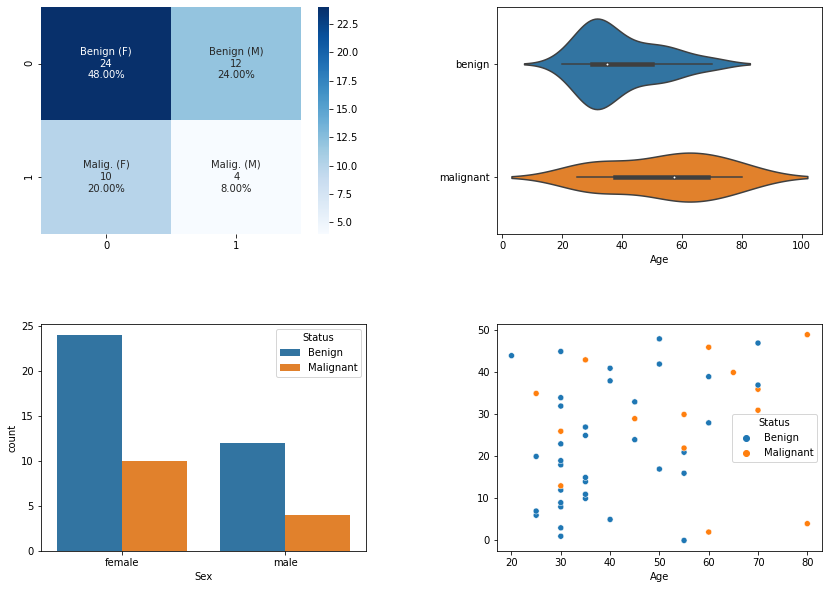

In [13]:
fig = plt.figure(figsize=(14,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Parameter 1: The number of rows 
# Parameter 2: The number of columns
# Parameter 3: The graph position 

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax2.set(xlabel='Age')
ax3 = fig.add_subplot(2, 2, 3)
ax3.set(xlabel='Sex', ylabel='Count')
ax4 = fig.add_subplot(2, 2, 4)


# Use confusion matrix and labels
sns.heatmap(conf_mat, annot=labels, fmt='', cmap='Blues', ax=ax1)

# Use lists from violin plot
sns.violinplot(benign_ages  + malignant_ages, flags, ax=ax2)

# We use the lesion data to fill the remaining plots
sns.countplot(x="Sex", hue="Status", data=lesion_data, ax=ax3)

sns.scatterplot(x='Age', y=[i for i in range(len(lesion_data))], hue="Status", data = lesion_data, ax=ax4)

# What did you find out about malignant lesions? 
